# 2D Random Walk with Unequal Probabilities
이 문제는 2D 랜덤 워크를 불균등한 확률로 시뮬레이션하고 이를 시각화하는 것입니다.

랜덤 워크는 매 단계마다 특정 확률에 따라 움직이는 행위를 의미합니다.


---



먼저 수학적으로 생각해보면 다음과 같습니다.

1000번 중에 700번은 오른쪽으로 300번은 왼쪽으로 이동

1000번 중에 600번은 위쪽으로 400번은 아래쪽으로 이동

따라서 이를 고려하면 최종 좌표는 (400,200)이 됩니다.

원점으로부터 거리를 따져보면 루트200000, 약 447.21이라는 값을 갖게 됩니다.


---

이제 코드를 통해 확인해보겠습니다.

우선 총 5번의 시뮬레이션을 진행할 것이고, 각 시뮬레이션의 결과값을 평균을 내어 위의 수학적으로 계산한 거리와 비교하는 방향으로 코드를 작성했습니다.

랜덤 시드를 고정하여 매 시뮬레이션 결과가 같아지도록 할 수 있었지만, 여러 결과를 따로 도출하여 평균을 내어 비교하고 싶었습니다.

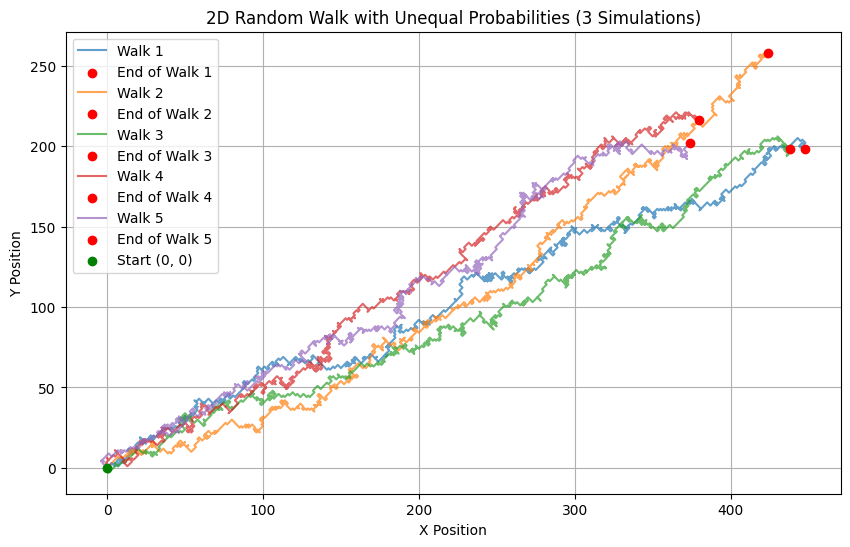

Final position of Walk 1: (448, 198)
Total distance from origin of Walk 1: 489.80
Final position of Walk 2: (424, 258)
Total distance from origin of Walk 2: 496.33
Final position of Walk 3: (438, 198)
Total distance from origin of Walk 3: 480.67
Final position of Walk 4: (380, 216)
Total distance from origin of Walk 4: 437.10
Final position of Walk 5: (374, 202)
Total distance from origin of Walk 5: 425.06

Theoretical final position: (x=400, y=200)
Theoretical total distance from origin: 447.21

Average final position after 3 walks: [412.8 214.4]
Average total distance from origin after 3 walks: 465.79


In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# (1) Step Generation Function
def simulate_random_walk(n_steps=1000):
    # x축: +1로 이동할 확률 70%, -1로 이동할 확률 30%
    # y축: +1로 이동할 확률 60%, -1로 이동할 확률 40%
    x_steps = np.random.choice([-1, 1], size=n_steps, p=[0.3, 0.7])
    y_steps = np.random.choice([-1, 1], size=n_steps, p=[0.4, 0.6])

    # 누적합 계산
    x_position = np.cumsum(x_steps)
    y_position = np.cumsum(y_steps)

    # 최종 위치 및 유클리드 거리 계산
    final_position = (x_position[-1], y_position[-1])
    euclidean_distance = np.sqrt(final_position[0]**2 + final_position[1]**2)

    return final_position, euclidean_distance, x_position, y_position

# 시뮬레이션 5회 실행
n_simulations = 5
final_positions = []
distances = []

plt.figure(figsize=(10, 6))

for i in range(n_simulations):
    final_pos, dist, x_pos, y_pos = simulate_random_walk()
    final_positions.append(final_pos)
    distances.append(dist)

    # 각 시뮬레이션의 궤적을 그리기
    plt.plot(x_pos, y_pos, label=f'Walk {i+1}', alpha=0.7)

    # 각 시뮬레이션의 종착점에 빨간 점 표시
    plt.scatter(final_pos[0], final_pos[1], color='red', label=f'End of Walk {i+1}', zorder=5)

# (3) Plot the Walk
plt.scatter(0, 0, color='green', label='Start (0, 0)', zorder=5)  # 시작점 (0, 0)

plt.title('2D Random Walk with Unequal Probabilities (3 Simulations)')
plt.xlabel('X Position')
plt.ylabel('Y Position')
plt.legend()
plt.grid(True)
plt.show()

# 시뮬레이션 결과 출력
for i in range(n_simulations):
    print(f"Final position of Walk {i+1}: {final_positions[i]}")
    print(f"Total distance from origin of Walk {i+1}: {distances[i]:.2f}")

# (6) Expected Theoretical Calculation
theoretical_x = 400  # 700 - 300
theoretical_y = 200  # 600 - 400
theoretical_distance = np.sqrt(theoretical_x**2 + theoretical_y**2)
print(f"\nTheoretical final position: (x={theoretical_x}, y={theoretical_y})")
print(f"Theoretical total distance from origin: {theoretical_distance:.2f}")

# 시뮬레이션의 평균값 계산 및 출력
avg_final_position = np.mean(final_positions, axis=0)
avg_distance = np.mean(distances)

print(f"\nAverage final position after 3 walks: {avg_final_position}")
print(f"Average total distance from origin after 3 walks: {avg_distance:.2f}")

#코드 설명
1. def simulate_random_walk(n_steps=1000)라는 함수를 정의하여 확률적으로 랜덤 워크가 실행할 수 있도록 하였습니다.

또한 배열의 누적합을 계산하도록 하여 각 스텝에서 이동한 거리를 계속 더해나감으로써 각 순간의 좌표를 계산하도록 하였습니다.

그리고 유클리드 거리계산을 하기 위하여 'final_position = (x_position[-1], y_position[-1])' 즉, 각 포지션의 마지막 배열값을 가져와 거리 계산을 하도록 하였습니다.

2. 시뮬레이션 횟수는 5회로 결정하였고, 최종 위치를 저장할 리스트와 유클리드 거리를 저장할 리스트를 생성했습니다.

3. 이후에는 for문을 통해 반복 수행하도록 하였고, simulate_random_walk() 함수가 호출되어 랜덤 워크를 시뮬레이션하면서 최종위치/유클리드 거리/누적 x,y좌표의 배열 각각을 반환하도록 하였습니다.

distances.append(dist) --> append를 사용하여 각 시뮬레이션이 끝날때마다 기존의 리스트에 거리가 계속해서 누적되도록 하였습니다.

그리고 그래프와 결과가 도출이 되도록 하였습니다.

#결과분석
랜덤 시드를 지정하지 않아 5번의 시뮬레이션 모두 다른 값이 나왔고 확률적으로 계산한 값과 거의 일치하는 값을 얻을 수 있었습니다. 반복 횟수를 바꿔가며 진행해보니 **반복횟수가 적은 경우에는 확률적으로 계산한 값과 큰 차이가 나는 경우가 많았는데 반복횟수를 크게 늘린 경우에는 확률적으로 계산한 값에서 크게 벗어나지 않음을 확인**할 수 있었습니다.



#Analyzing Olympic Medals Data
이 문제의 경우에는 Pandas와 Dataframe을 사용하여 가상의 올림픽 메달 데이터를 분석하는 것입니다.

임의의 국가, 연도, 금메달, 은메달, 동메달의 열을 가진 데이터프레임을 형성하고 다음과 같은 과정을 수행하는 것이 이 문제의 목적입니다.

1. 메달 총합 계산

2. 총 가중 점수 계산(금메달=3, 은메달=2, 동메달=1)

3. 국가별로 연도에 걸쳐 평균 메달 점수를 계산하고, 이 평균 점수가 가장 높은 국가 색출

4. 5개 국가의 금메달 수를 보여주는 바 차트 작성

예시에 있는 국가와 메달 수를 이용해 다음과 같은 코드를 작성했습니다.


Olympic Medal Data:
   Country  Year  Gold  Silver  Bronze  Total Medals  Total Score
0      USA  2016     9      19       4            32           69
1    China  2016     5       7       0            12           29
2   Russia  2016    11      10      13            34           66
3  Germany  2016    10      14      15            39           73
4    Japan  2016     5       6      17            28           44
5      USA  2020    16       1      15            32           65
6    China  2020     3       1       9            13           20
7   Russia  2020     0      16       5            21           37
8  Germany  2020    18      17      16            51          104
9    Japan  2020     2      10       1            13           27

Total Medals for Each Country (per year):
   Country  Year  Total Medals
0      USA  2016            32
1    China  2016            12
2   Russia  2016            34
3  Germany  2016            39
4    Japan  2016            28
5      USA  2020         

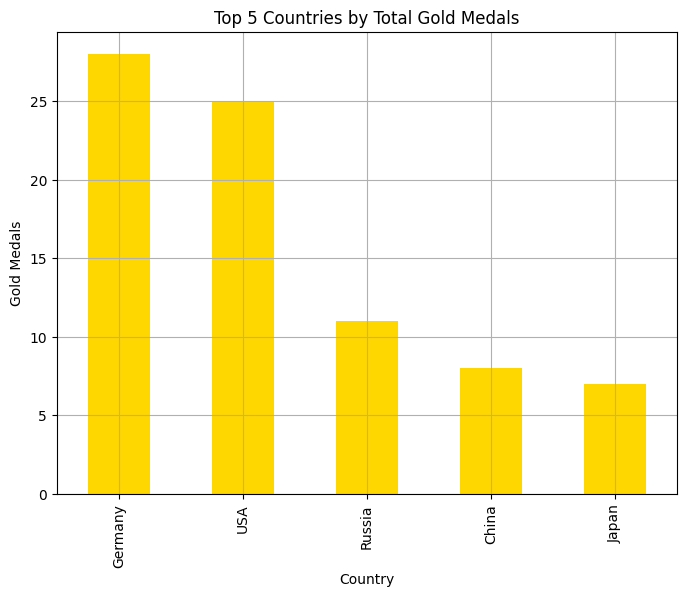

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# (1) Create a DataFrame
data = {
    'Country': ['USA', 'China', 'Russia', 'Germany', 'Japan', 'USA', 'China', 'Russia', 'Germany', 'Japan'],
    'Year': [2016, 2016, 2016, 2016, 2016, 2020, 2020, 2020, 2020, 2020],
    'Gold': [9, 5, 11, 10, 5, 16, 3, 0, 18, 2],
    'Silver': [19, 7, 10, 14, 6, 1, 1, 16, 17, 10],
    'Bronze': [4, 0, 13, 15, 17, 15, 9, 5, 16, 1]
}

df = pd.DataFrame(data)

# (2) Calculate the total medal count for each country
df['Total Medals'] = df['Gold'] + df['Silver'] + df['Bronze']

# (3) Create a new column for the total weighted score
# Formula: Total Score = 3 * Gold + 2 * Silver + 1 * Bronze
df['Total Score'] = 3 * df['Gold'] + 2 * df['Silver'] + 1 * df['Bronze']

# (4) Find the country with the highest total score
total_scores = df.groupby('Country')['Total Score'].sum()
top_country = total_scores.idxmax()
top_score = total_scores.max()

# (5) Create a bar plot for the top 5 countries with the most gold medals
top_5_gold = df.groupby('Country')['Gold'].sum().nlargest(5)

# Output the relevant results
print("Olympic Medal Data:")
print(df)
print("\nTotal Medals for Each Country (per year):")
print(df[['Country', 'Year', 'Total Medals']])
print("\nTotal Weighted Score for Each Country (per year):")
print(df[['Country', 'Year', 'Total Score']])

print(f"\nCountry with the highest average medal score: {top_country}")
print("\nAverage Medal Scores by Country:")
print(avg_scores)

plt.figure(figsize=(8, 6))
top_5_gold.plot(kind='bar', color='gold')
plt.title('Top 5 Countries by Total Gold Medals')
plt.xlabel('Country')
plt.ylabel('Gold Medals')
plt.grid(True)
plt.show()

#코드 설명
1. 메달 수를 데이터 프레임 형태로 저장(2차원 데이터 표)하여 인덱싱 및 슬라이싱을 통해 쉽게 데이터에 접근 할 수 있습니다.

2. 'df['Total Medals'] = df['Gold'] + df['Silver'] + df['Bronze']'는 각 열의 값을 더한 결과로 새로운 열을 생성하고 더한 결과를 저장합니다.

3. 'df['Total Score'] = 3 * df['Gold'] + 2 * df['Silver'] + 1 * df['Bronze']'는 메달 종류에 가중치를 부여하여 새로운 열에 각국의 메달 점수를 저장합니다.

4. groupby()는 데이터를 특정 열을 기준으로 그룹화할 수 있게 해주는 함수입니다. 여기서는 국가 열을 기준으로 데이터를 그룹화하였습니다.
'.sum()'은 각 국가의 토탈 점수를 합산해 국가별 총 점수를 계산할 수 있습니다.
또 토탈 점수는 series 객체가 됩니다.

5. 'top_country = total_scores.idxmax()'는 최대값을 가진 인덱스를 반환하여 top_country에 저장합니다.

6. 'top_score = total_scores.max()'도 마찬가지로 토탈 점수에서 가장 큰 값을 top_score에 반환합니다.

7. 'top_5_gold = df.groupby('Country')['Gold'].sum().nlargest(5)' 각 국가의 금메달 수를 합산한 후에 가장 큰 값을 가진 5개를 반환합니다.

8. 위의 저장된 값들을 print를 통해서 출력했습니다.

9. 또한 금메달 수가 가장 많은 상위 5개 국가에 대해 막대 그래프를 출렸했습니다.

#요약
이 코드는 국가별로 메달 획득 데이터를 분석한 후, 각 국가의 메달 가중치를 반영한 총 점수를 구하여 상위 국가들을 시각화하는 작업을 수행합니다. grouby, sum, max, 그래프 시각화 기능을 활용하여 데이터를 효율적으로 분석하고 표현했습니다.